In [2]:
using SpeedyWeather, TravellingSailorProblem, GLMakie

In [63]:
# create a simulation for 26 children
spectral_grid = SpectralGrid(trunc=31, nlayers=8, Grid=HEALPixGrid)

SpectralGrid{Spectrum{...}, HEALPixGrid{...}}
├ Number format: Float32
├ Spectral:      T31 LowerTriangularMatrix
├ Grid:          47-ring HEALPixGrid, 1728 grid points
├ Resolution:    4.89°, 543km (at 6371km radius)
├ Vertical:      8-layer atmosphere, 2-layer land
└ Architecture:  CPU using Array

In [58]:
nparticles = 2*spectral_grid.npoints

9024

In [64]:
spectral_grid = SpectralGrid(trunc=31, nlayers=8, nparticles=nparticles, Grid=HEALPixGrid)

SpectralGrid{Spectrum{...}, HEALPixGrid{...}}
├ Number format: Float32
├ Spectral:      T31 LowerTriangularMatrix
├ Grid:          47-ring HEALPixGrid, 1728 grid points
├ Resolution:    4.89°, 543km (at 6371km radius)
├ Particles:     9024
├ Vertical:      8-layer atmosphere, 2-layer land
└ Architecture:  CPU using Array

In [8]:
particle_advection = ParticleAdvection2D(spectral_grid, layer=8)
model = PrimitiveWetModel(spectral_grid; particle_advection)
simulation = initialize!(model)

# add particle tracker
particle_tracker = ParticleTracker(spectral_grid)
add!(model, :particle_tracker => particle_tracker)

### Getting the lon lat of the grid points

In [13]:
londs, latds = RingGrids.get_londlatds(spectral_grid.grid)

([0.0, 18.0, 36.0, 54.0, 72.0, 90.0, 108.0, 126.0, 144.0, 162.0  …  180.0, 198.0, 216.0, 234.0, 252.0, 270.0, 288.0, 306.0, 324.0, 342.0], [87.15909455586296, 87.15909455586296, 87.15909455586296, 87.15909455586296, 87.15909455586296, 87.15909455586296, 87.15909455586296, 87.15909455586296, 87.15909455586296, 87.15909455586296  …  -87.15909455586298, -87.15909455586298, -87.15909455586298, -87.15909455586298, -87.15909455586298, -87.15909455586298, -87.15909455586298, -87.15909455586298, -87.15909455586298, -87.15909455586298])

### Particle locations to adjust

In [22]:
# adjust initial locations of particles
(; particles) = simulation.prognostic_variables
particles

3168-element Vector{Particle{Float64}}:
 Particle{Float64}(  active,   0.00˚E,  87.16˚N, σ = 0.00)
 Particle{Float64}(  active,  18.00˚E,  87.16˚N, σ = 0.00)
 Particle{Float64}(  active,  36.00˚E,  87.16˚N, σ = 0.00)
 Particle{Float64}(  active,  54.00˚E,  87.16˚N, σ = 0.00)
 Particle{Float64}(  active,  72.00˚E,  87.16˚N, σ = 0.00)
 Particle{Float64}(  active,  90.00˚E,  87.16˚N, σ = 0.00)
 Particle{Float64}(  active, 108.00˚E,  87.16˚N, σ = 0.00)
 Particle{Float64}(  active, 126.00˚E,  87.16˚N, σ = 0.00)
 Particle{Float64}(  active, 144.00˚E,  87.16˚N, σ = 0.00)
 Particle{Float64}(  active, 162.00˚E,  87.16˚N, σ = 0.00)
 Particle{Float64}(  active, 180.00˚E,  87.16˚N, σ = 0.00)
 Particle{Float64}(  active, 198.00˚E,  87.16˚N, σ = 0.00)
 Particle{Float64}(  active, 216.00˚E,  87.16˚N, σ = 0.00)
 ⋮
 Particle{Float64}(  active, 144.00˚E, -87.16˚N, σ = 0.00)
 Particle{Float64}(  active, 162.00˚E, -87.16˚N, σ = 0.00)
 Particle{Float64}(  active, 180.00˚E, -87.16˚N, σ = 0.00)
 Particle{Flo

### Set particles to grid points and perturb

In [24]:
particles[1:2:end] .= [Particle(londs[i], latds[i]) for i in 1:spectral_grid.npoints]
particles[2:2:end] .= [Particle(londs[i] + randn()/10, latds[i]) for i in 1:spectral_grid.npoints]
particles

6336-element Vector{Particle{Float32}}:
 Particle{Float32}(  active,   0.00˚E,  87.16˚N, σ = 0.00)
 Particle{Float32}(  active,   0.05˚E,  87.16˚N, σ = 0.00)
 Particle{Float32}(  active,  18.00˚E,  87.16˚N, σ = 0.00)
 Particle{Float32}(  active,  17.90˚E,  87.16˚N, σ = 0.00)
 Particle{Float32}(  active,  36.00˚E,  87.16˚N, σ = 0.00)
 Particle{Float32}(  active,  36.03˚E,  87.16˚N, σ = 0.00)
 Particle{Float32}(  active,  54.00˚E,  87.16˚N, σ = 0.00)
 Particle{Float32}(  active,  53.95˚E,  87.16˚N, σ = 0.00)
 Particle{Float32}(  active,  72.00˚E,  87.16˚N, σ = 0.00)
 Particle{Float32}(  active,  72.10˚E,  87.16˚N, σ = 0.00)
 Particle{Float32}(  active,  90.00˚E,  87.16˚N, σ = 0.00)
 Particle{Float32}(  active,  89.88˚E,  87.16˚N, σ = 0.00)
 Particle{Float32}(  active, 108.00˚E,  87.16˚N, σ = 0.00)
 ⋮
 Particle{Float32}(  active, 252.00˚E, -87.16˚N, σ = 0.00)
 Particle{Float32}(  active, 252.00˚E, -87.16˚N, σ = 0.00)
 Particle{Float32}(  active, 270.00˚E, -87.16˚N, σ = 0.00)
 Particle{Flo

In [25]:
# then run! simulation until Christmas
run!(simulation, period=Day(1))

[ Info: ParticleTracker writes to particles.nc as output=false
Weather is speedy: 100%|██████████████████| Time: 0:00:00 (430.86 years/day)


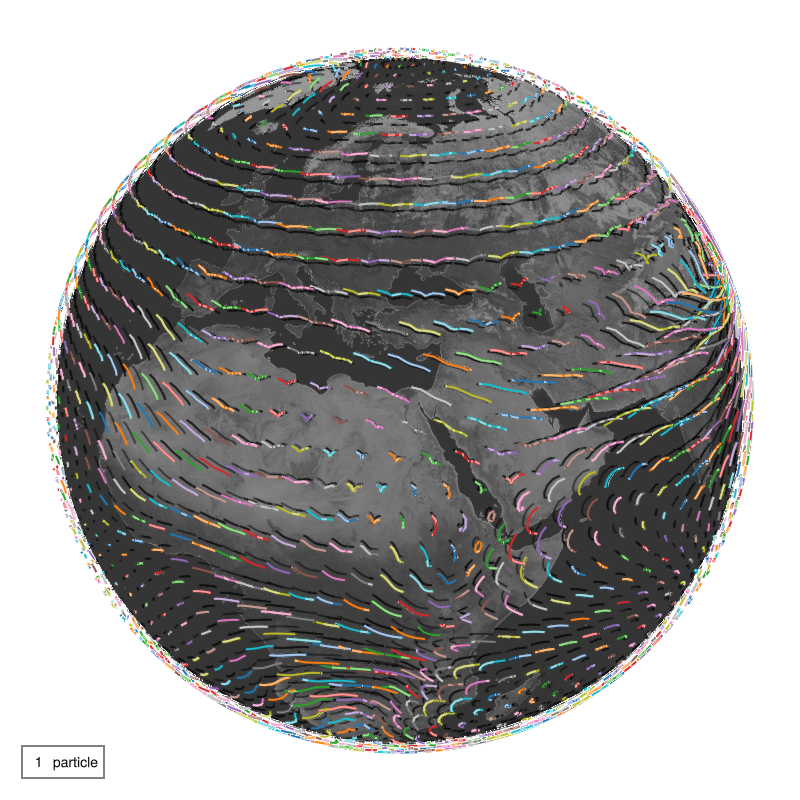

In [26]:
# and visualise
globe(particle_tracker)

In [29]:
function distance(p1, p2)
    dlon = abs(p1.lon - p2.lon)
    dlat = abs(p1.lat - p2.lat)
    return sqrt(dlon^2 + dlat^2)
end

distance (generic function with 1 method)

In [27]:
### Calculate Lyapunov

In [31]:
distances = [distance(particles[2i - 1], particles[2i]) for i in 1:spectral_grid.npoints]

3168-element Vector{Float32}:
 0.030178031
 0.076946564
 0.02172451
 0.041946195
 0.09595971
 0.12513211
 0.10781908
 0.071105964
 0.03498842
 0.07051089
 0.034729086
 0.14592306
 0.17211221
 ⋮
 0.0046395753
 0.013429511
 0.00043694524
 0.0002866866
 0.0036725213
 0.036308482
 4.3158372f-5
 0.014784766
 0.002679167
 0.07663766
 0.037586965
 0.31103048

In [65]:
grid = spectral_grid.grid
# distances_grid = Field(distances, grid)

47-ring HEALPixGrid
├ nlat_half=24 (1728 points, ~4.9˚, reduced)
└ architecture: CPU

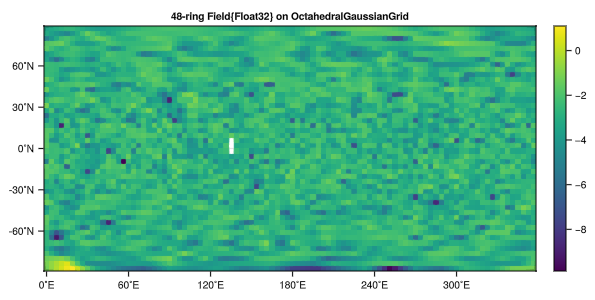

In [39]:
heatmap(log.(distances_grid))

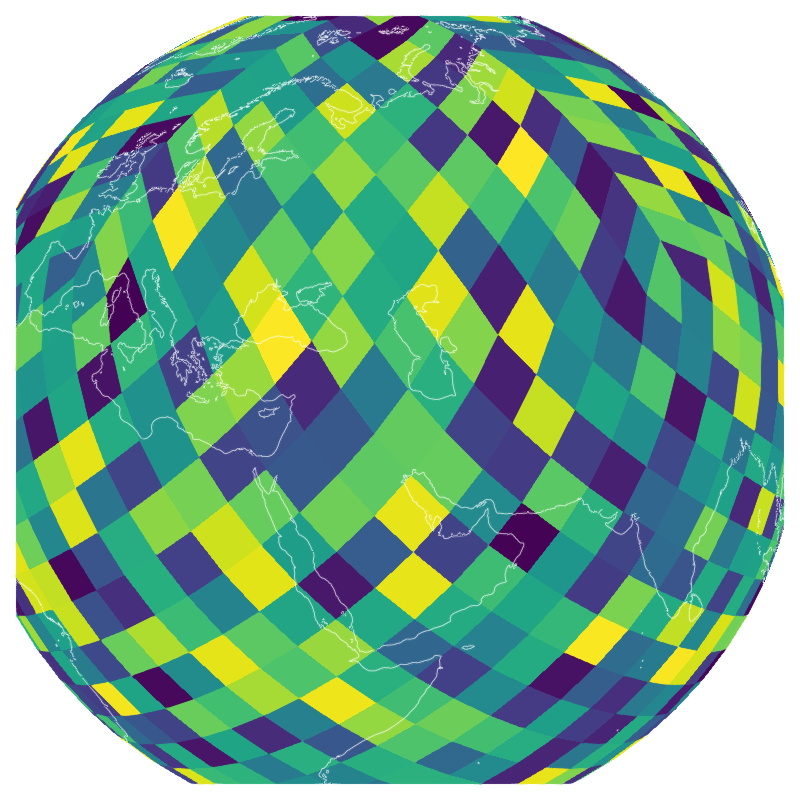

In [66]:
globe(rand(grid))

In [67]:
field = rand(grid)

1728-element, 47-ring HEALPixField{Float32, 1} as Array on CPU
 0.69387525f0
 0.6732521f0
 0.7081538f0
 0.3845514f0
 0.21875745f0
 0.99345696f0
 0.63313466f0
 0.3016107f0
 0.445576f0
 0.23013729f0
 0.7431387f0
 0.08485478f0
 0.3284309f0
 ⋮
 0.057896137f0
 0.13103795f0
 0.65437144f0
 0.5413977f0
 0.08519715f0
 0.8876976f0
 0.36011088f0
 0.6790224f0
 0.9790219f0
 0.82067776f0
 0.6753156f0
 0.4182781f0

In [70]:
function mean(field::HEALPixField)
    Σ = sum(field)
    return Σ/RingGrids.get_npoints2D(field)
end

mean (generic function with 1 method)

In [71]:
mean(field)

0.4961563f0

In [72]:
real(transform(field)[1]) / model.spectral_transform.norm_sphere

0.49615607f0